# EDA Data Science

Importar librerias 

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
from sqlalchemy import create_engine, Column, column, Integer, Float, String, Text, Boolean, Date, DateTime, Time, MetaData, Table, text, insert, select
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import find_dotenv , load_dotenv

Configurar conexion a base de datos

In [3]:
dotenv_patch=find_dotenv()

load_dotenv(dotenv_patch)

# Obtén los valores de las variables de entorno
username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
database = os.getenv('DB_DATABASE')

In [4]:
#Creo el engine para conectarme
db_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

In [5]:
df = pd.read_sql('historico', engine)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
29750,2024-02-23,372.079987,374.244995,370.255005,371.959991,2351104,0.0,0.0,HD
29751,2024-02-23,58.849998,59.430099,58.230099,59.160000,13321825,0.0,0.0,PYPL
29752,2024-02-23,183.809998,185.199997,183.190002,183.990005,5235899,0.0,0.0,JPM
29753,2024-02-23,526.750000,530.494995,524.159973,527.239990,2494619,0.0,0.0,UNH


In [6]:
#cerramos conexion una vez obtenidos los datos
engine.dispose()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29695 entries, 0 to 29694
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          29695 non-null  datetime64[ns]
 1   Open          29695 non-null  float64       
 2   High          29695 non-null  float64       
 3   Low           29695 non-null  float64       
 4   Close         29695 non-null  float64       
 5   Volume        29695 non-null  int64         
 6   Dividends     29695 non-null  float64       
 7   Stock Splits  29695 non-null  float64       
 8   Ticket        29695 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.0+ MB


Vamos a agregar algunas columnas y hacer unos calculos simples

In [7]:
acciones = df['Ticket'].unique()

In [8]:
df['Rendimiento_diario'] = df['Close'] - df['Open']


In [9]:
#calcular cambio porcentual diario
df['Cambio_porcentual_diario'] = ((df['Close'] - df['Open']) / df['Open']) * 100


creamos columnas con mes y fecha por si hay periodos estacionarios

In [10]:
df['Dia_semana'] = df['Date'].dt.dayofweek
df['Mes'] = df['Date'].dt.month


In [11]:
#Amplitud diaria
df['Amplitud_diaria'] = df['High'] - df['Low']


In [12]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Rendimiento_diario,Cambio_porcentual_diario,Dia_semana,Mes,Amplitud_diaria
0,2018-01-02,40.175166,40.680425,39.962672,40.670979,102223600,0.0,0.0,AAPL,0.495813,1.234127,1,1,0.717753
1,2018-01-03,40.734718,41.211646,40.600142,40.663887,118071600,0.0,0.0,AAPL,-0.070831,-0.173885,2,1,0.611504
2,2018-01-04,40.737080,40.956657,40.628475,40.852772,89738400,0.0,0.0,AAPL,0.115691,0.283995,3,1,0.328182
3,2018-01-05,40.949575,41.405251,40.857495,41.317894,94640000,0.0,0.0,AAPL,0.368319,0.899445,4,1,0.547755
4,2018-01-08,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,AAPL,0.000000,0.000000,0,1,0.396654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29750,2024-02-23,372.079987,374.244995,370.255005,371.959991,2351104,0.0,0.0,HD,-0.119995,-0.032250,4,2,3.989990
29751,2024-02-23,58.849998,59.430099,58.230099,59.160000,13321825,0.0,0.0,PYPL,0.310001,0.526765,4,2,1.200001
29752,2024-02-23,183.809998,185.199997,183.190002,183.990005,5235899,0.0,0.0,JPM,0.180008,0.097932,4,2,2.009995
29753,2024-02-23,526.750000,530.494995,524.159973,527.239990,2494619,0.0,0.0,UNH,0.489990,0.093021,4,2,6.335022


Vamos a realizar algunos graficos para ver si se ve algunas patrones

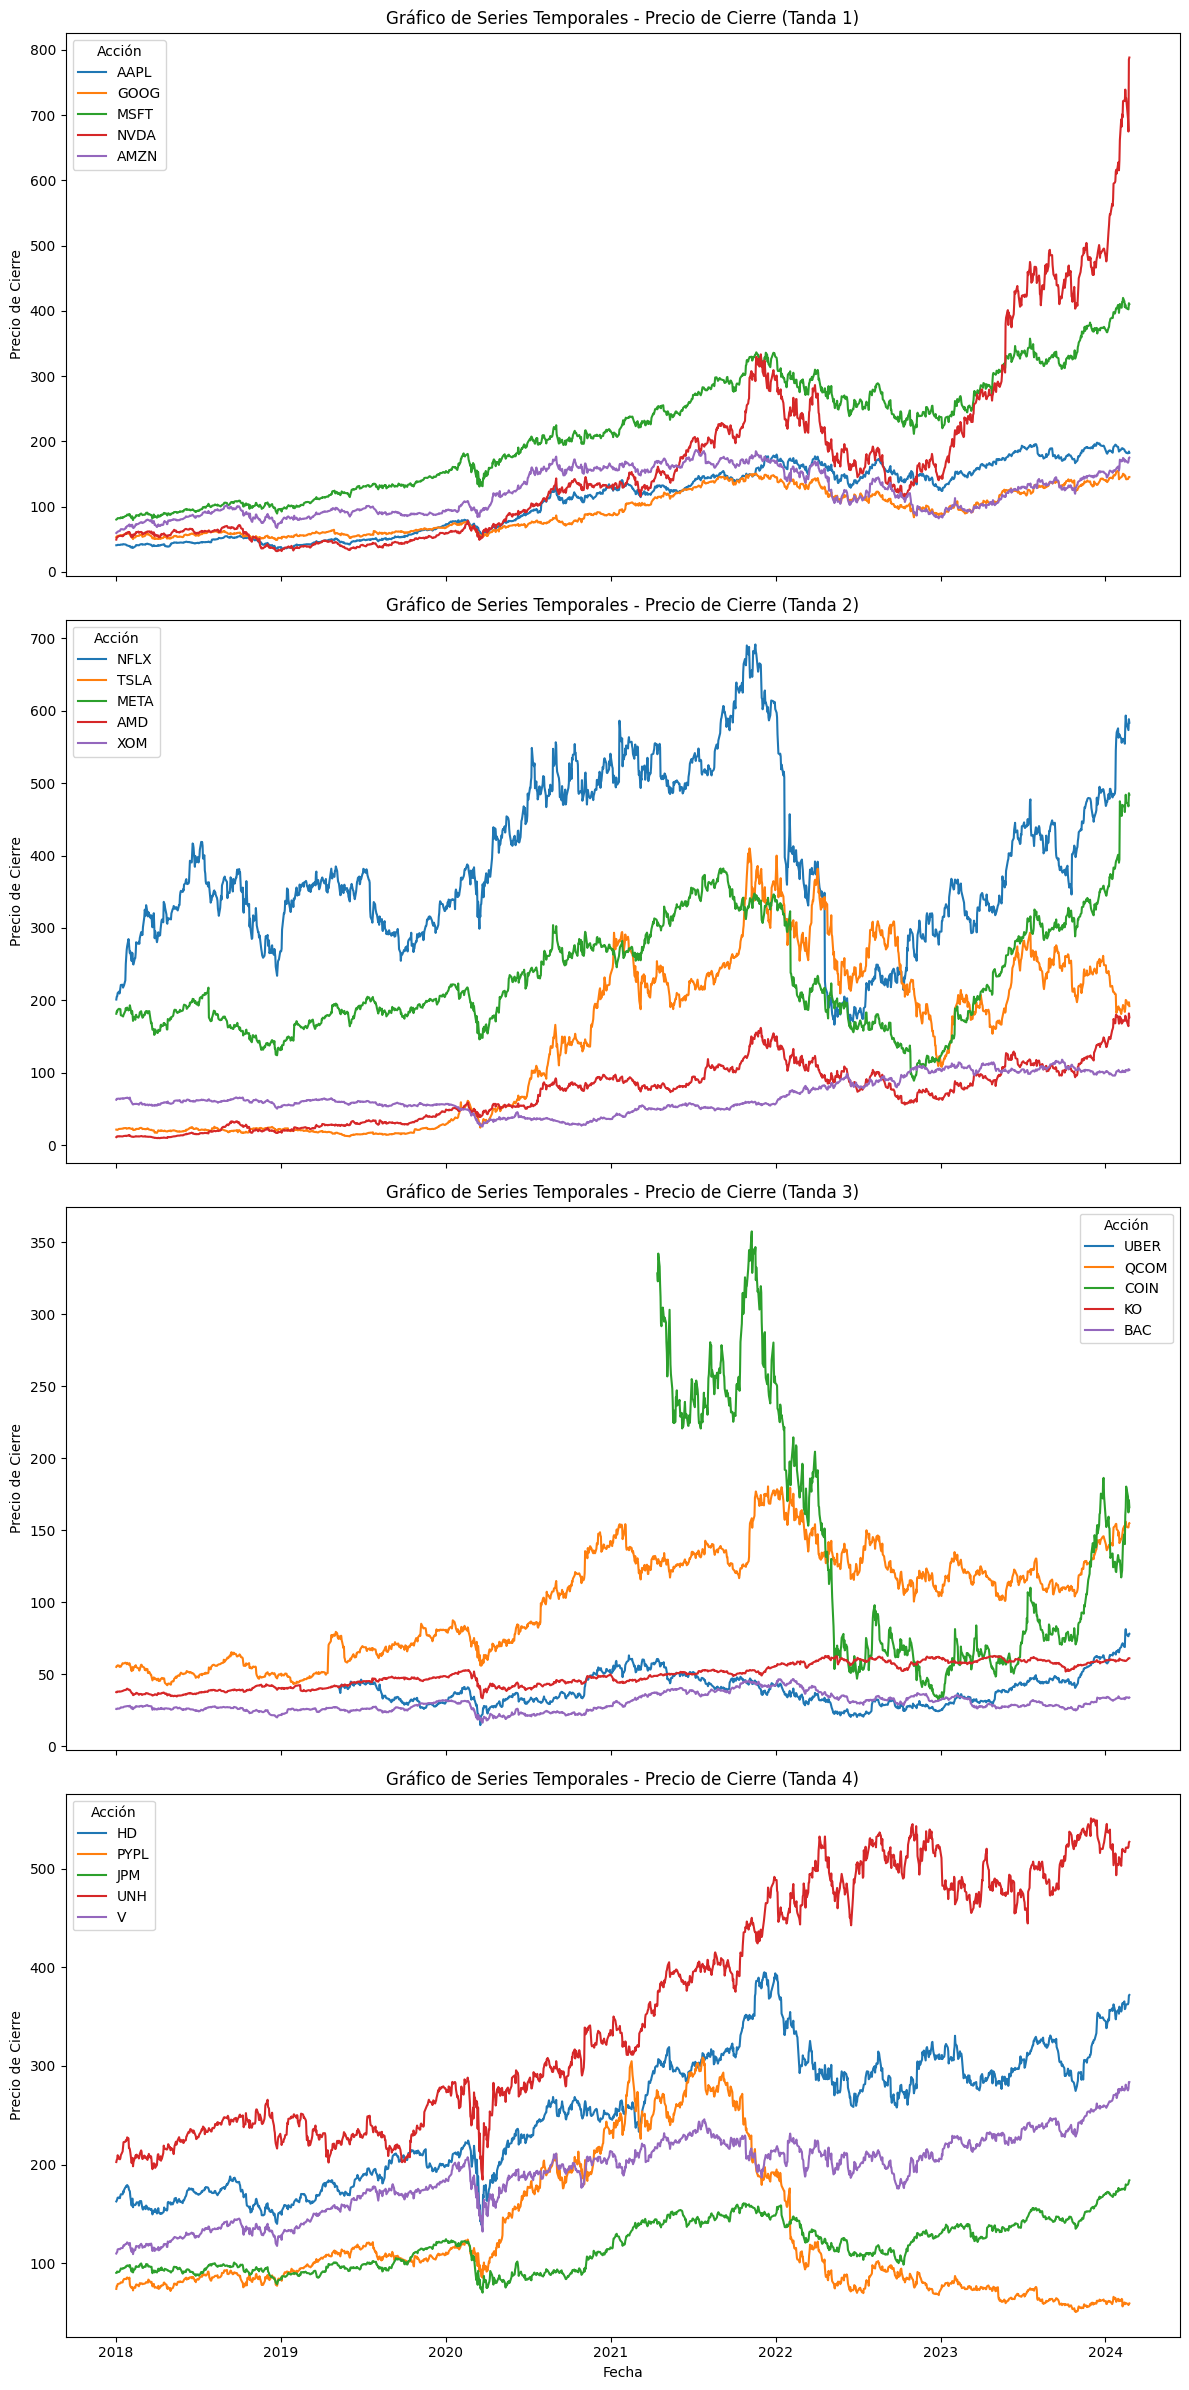

In [13]:
acciones_por_tanda = 5
num_tandas = (len(df['Ticket'].unique()) - 1) // acciones_por_tanda + 1

# Crear subgráficos
fig, axes = plt.subplots(num_tandas, 1, figsize=(12, num_tandas * 6), sharex=True)

# Generar gráficos para cada tanda de 5 acciones
for i, ax in enumerate(axes):
    subset_df = df[df['Ticket'].isin(list(df['Ticket'].unique())[i * acciones_por_tanda:(i + 1) * acciones_por_tanda])]
    sns.lineplot(x='Date', y='Close', hue='Ticket', data=subset_df, palette='tab10', ax=ax)
    ax.set_title(f'Gráfico de Series Temporales - Precio de Cierre (Tanda {i + 1})')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend(title='Acción')

plt.tight_layout()
plt.show()

Se realizo el historico de precios para ver si habia patrones de tiempo pero note que algunas acciones por el boom del momento de la IA le peromitio un alza en su valor


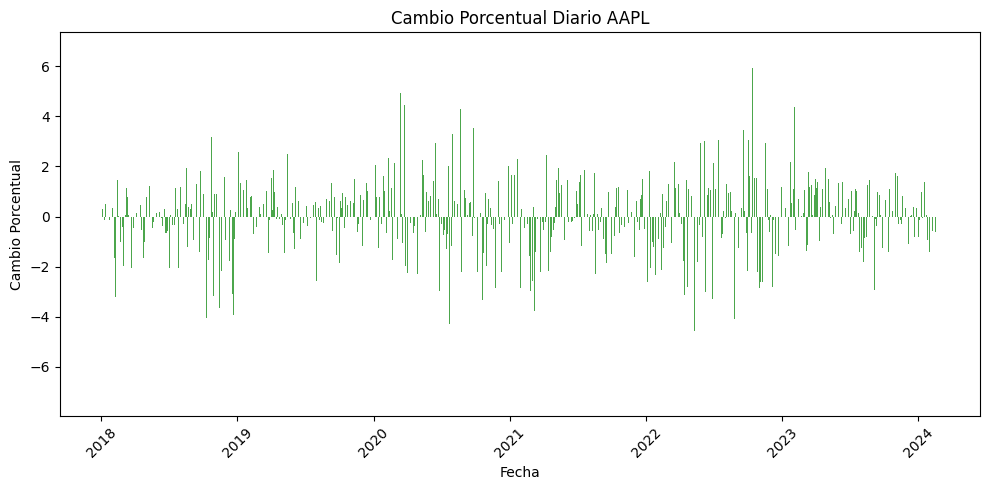

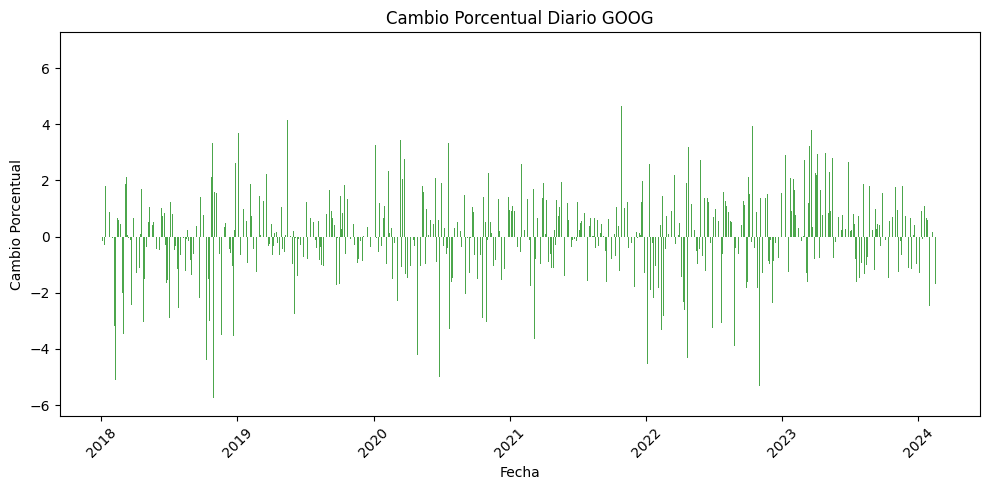

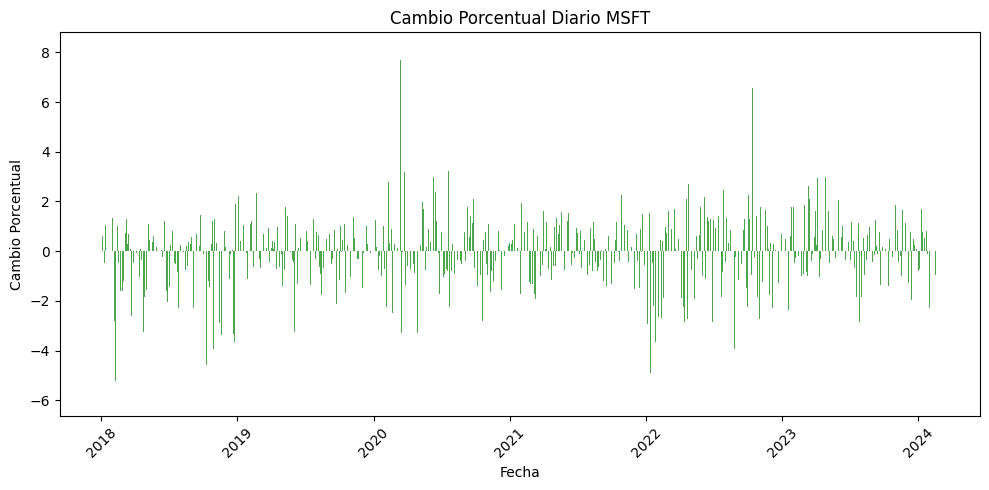

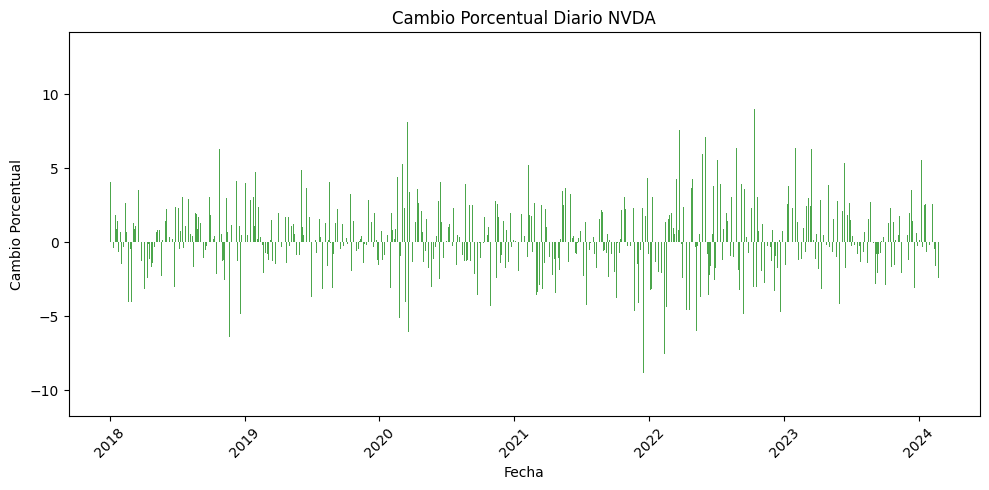

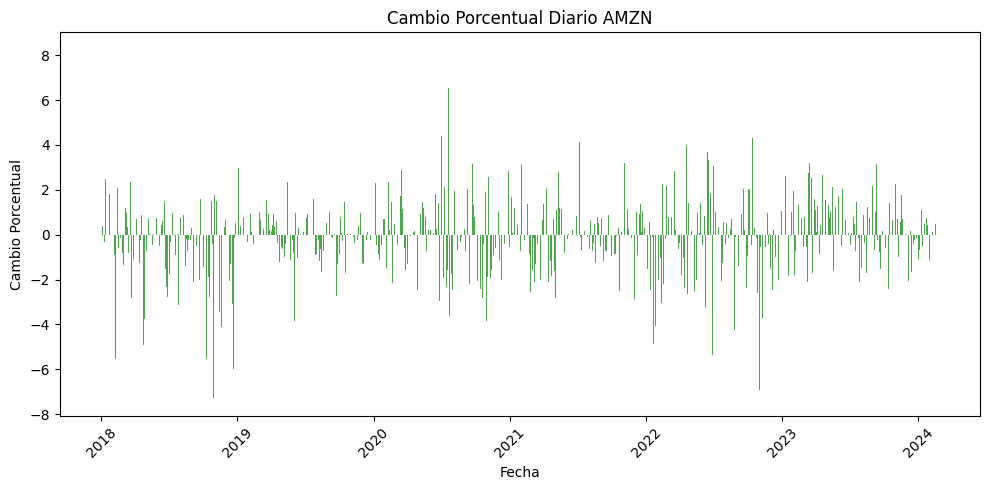

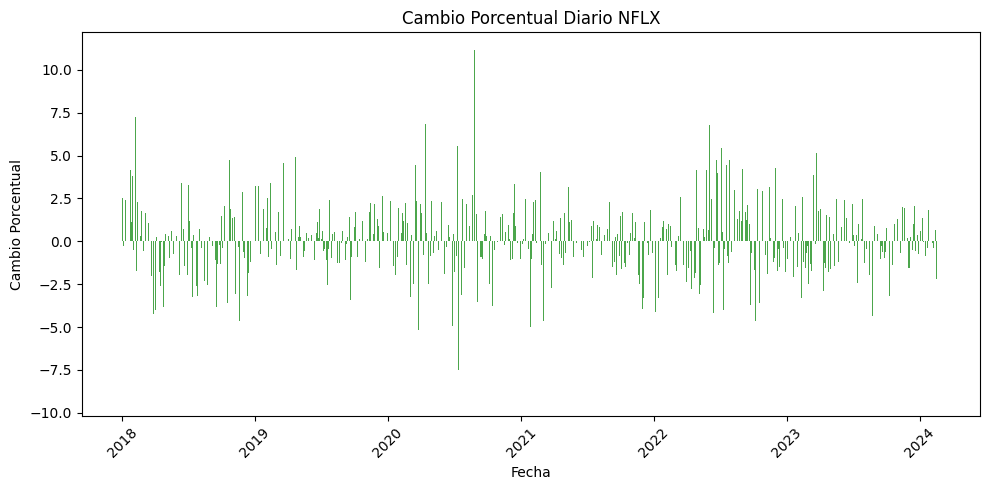

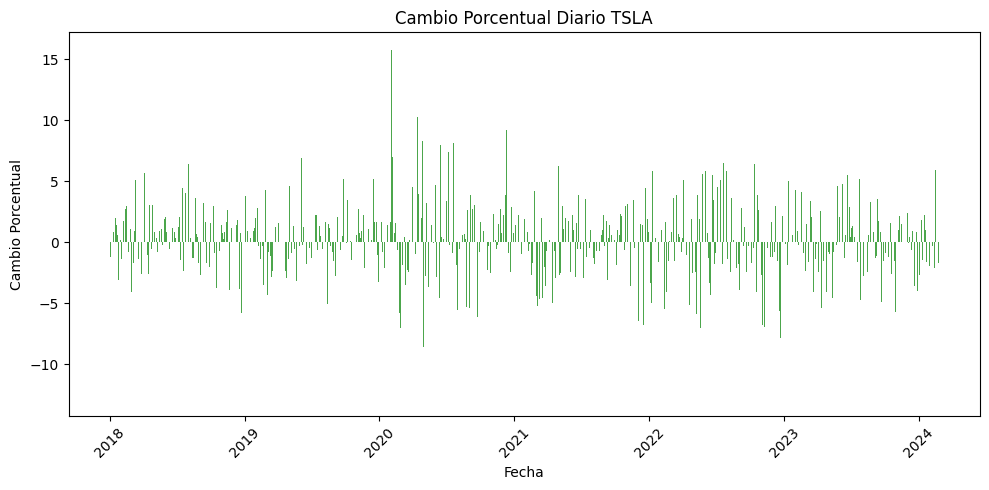

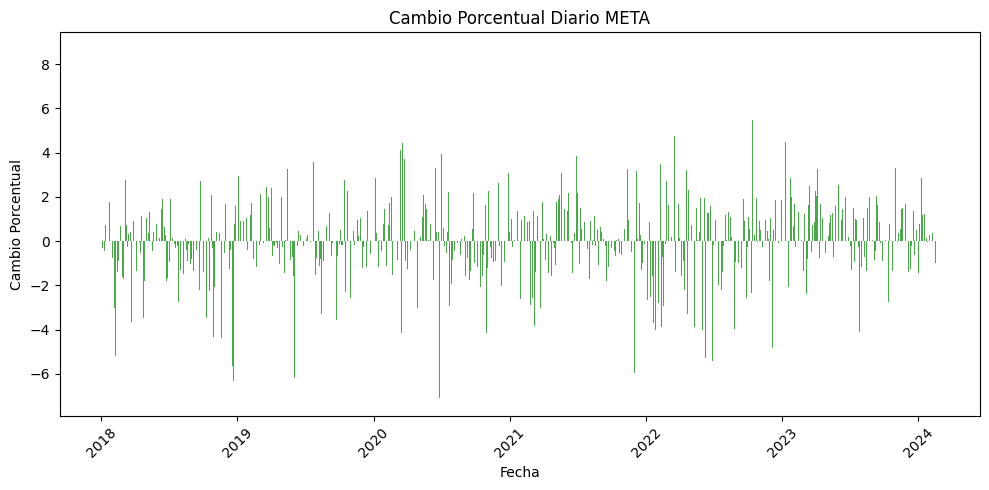

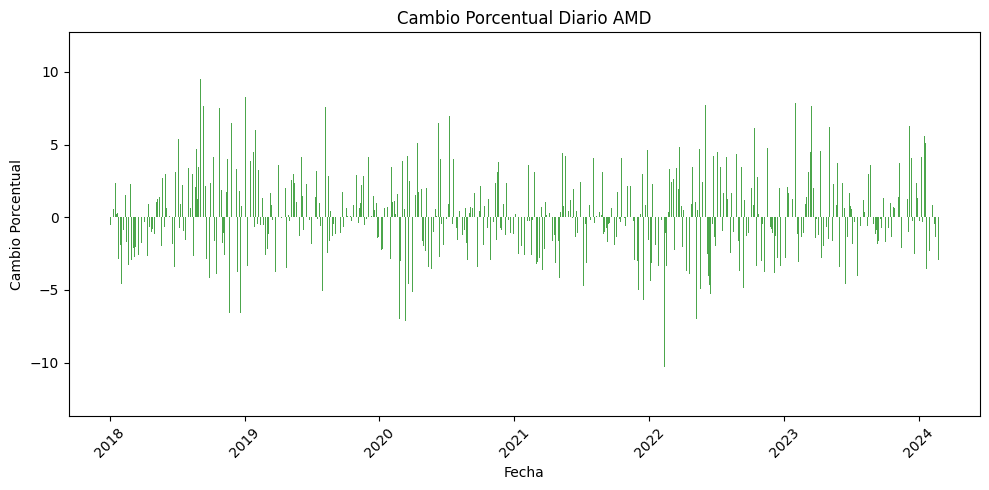

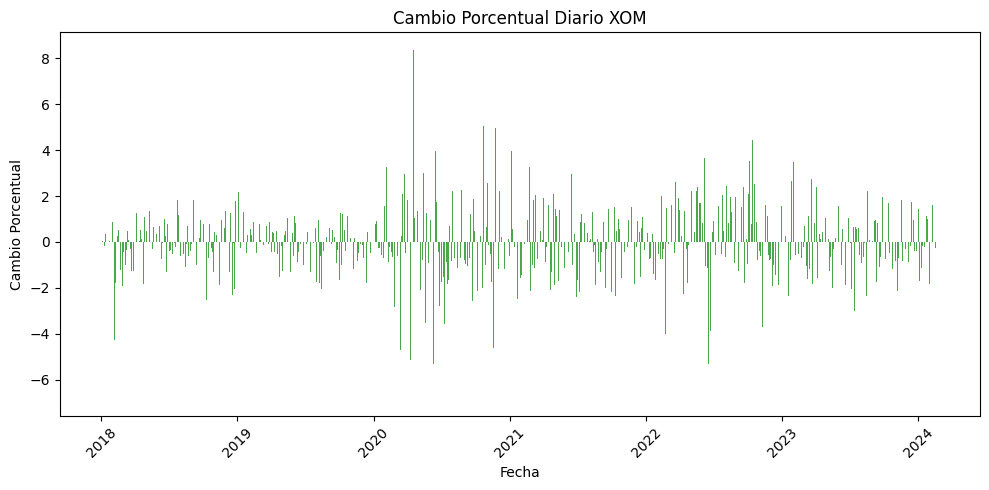

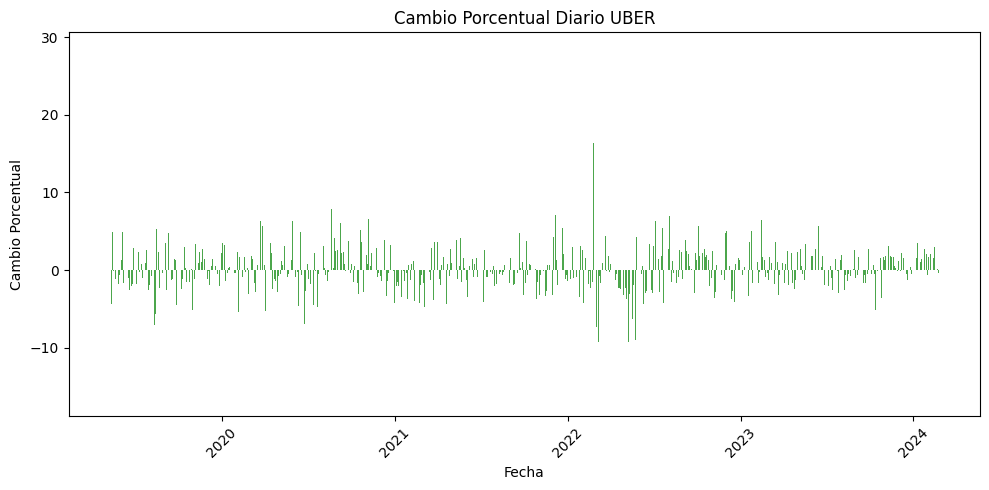

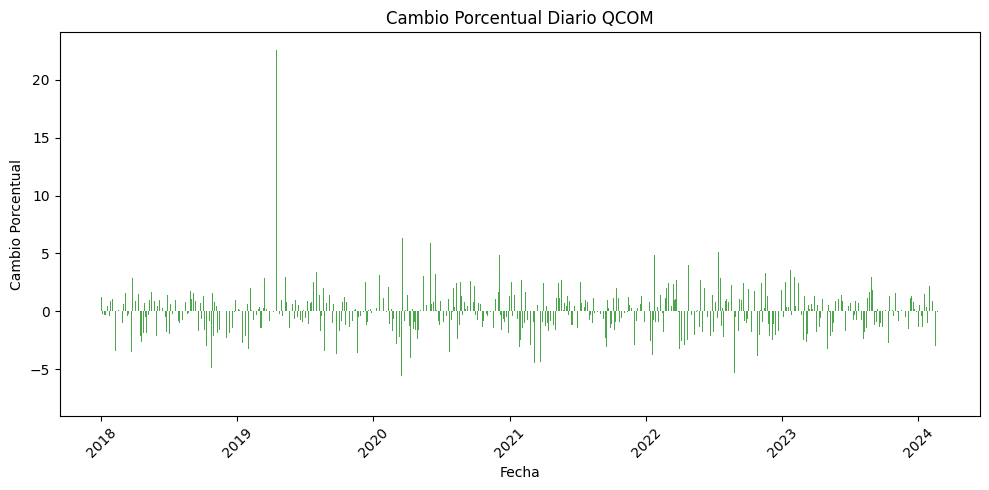

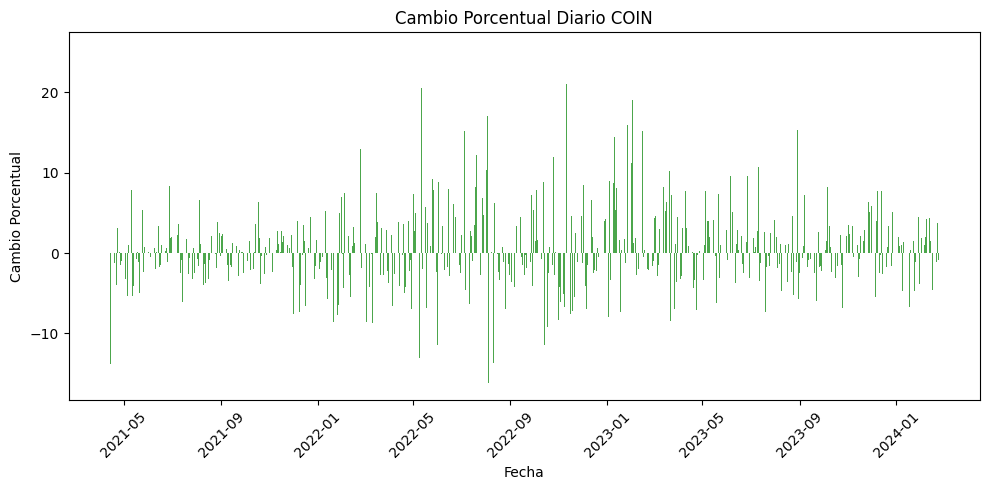

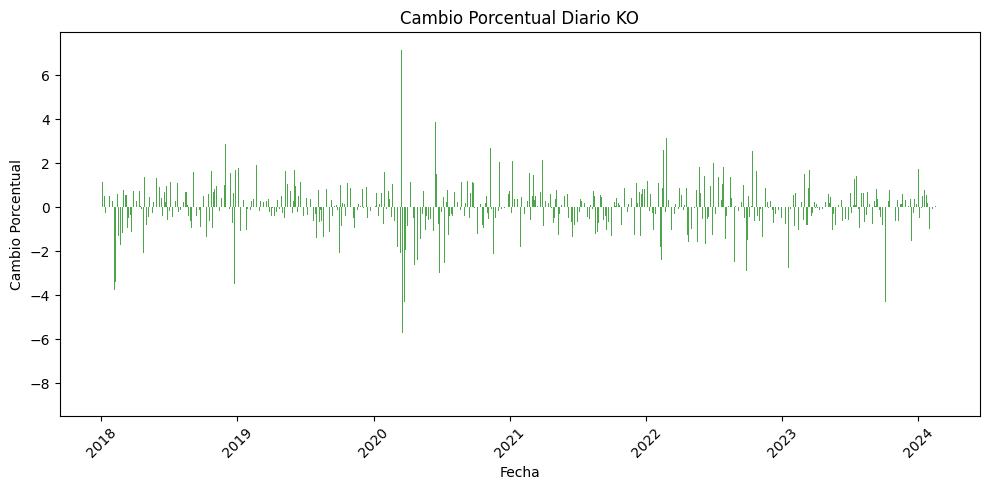

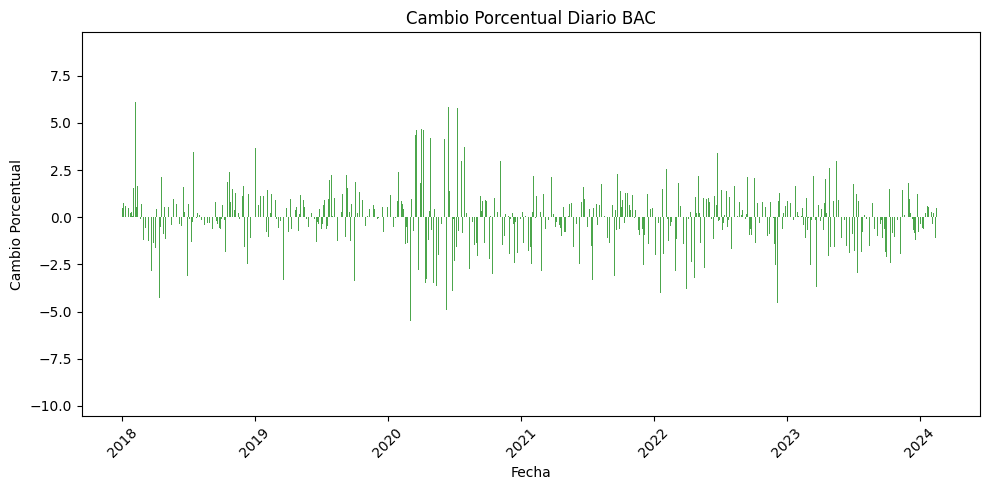

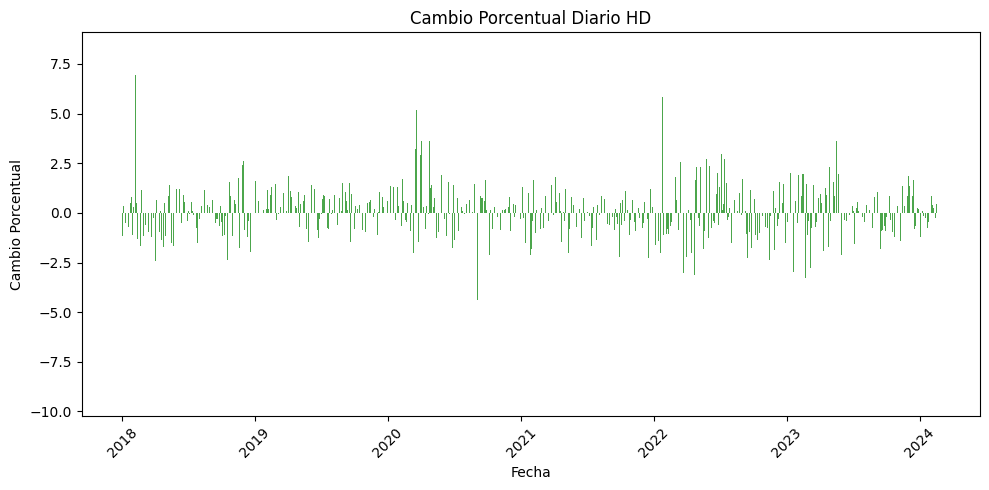

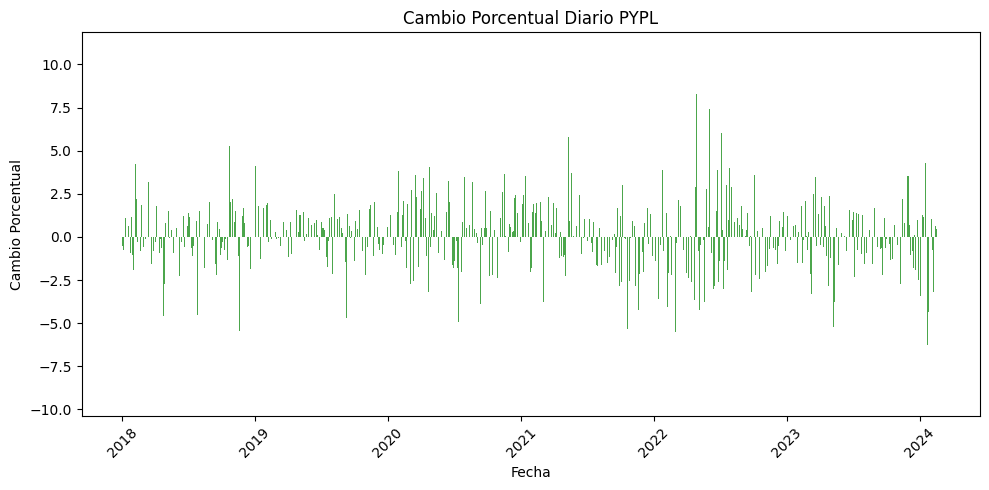

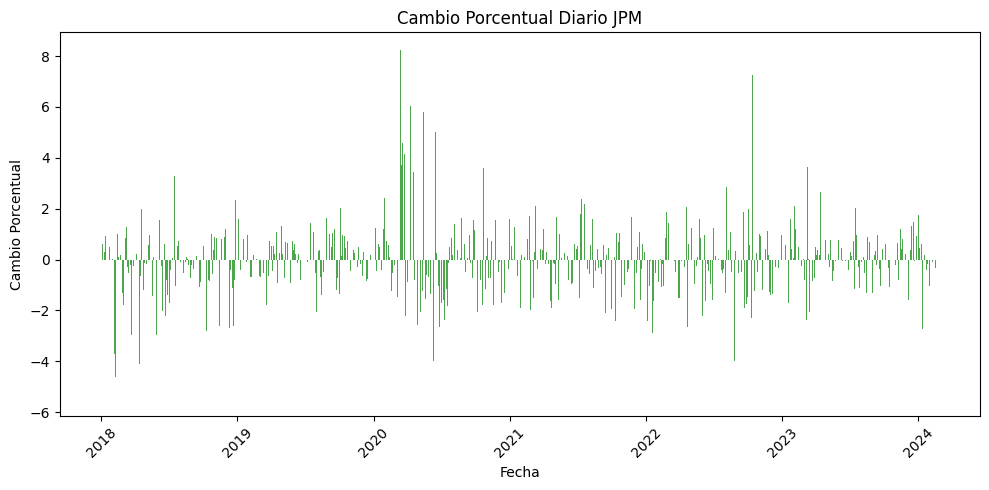

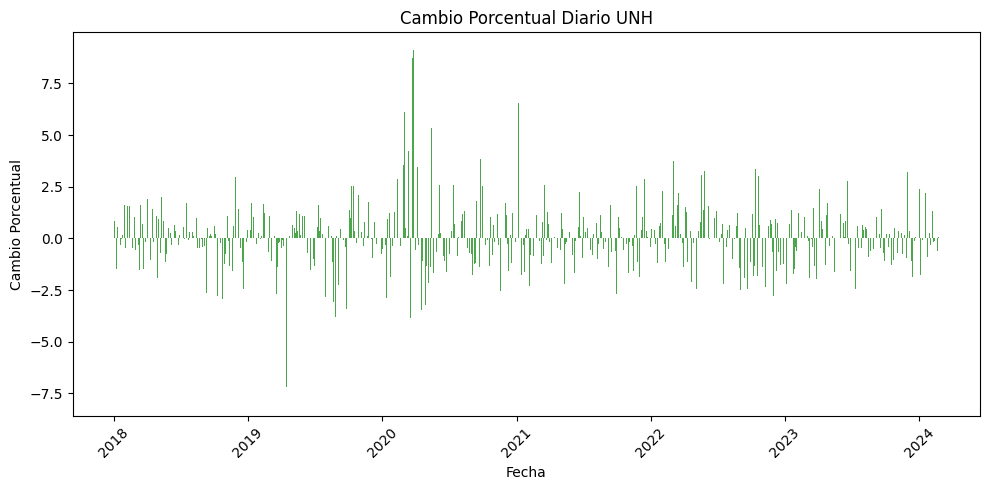

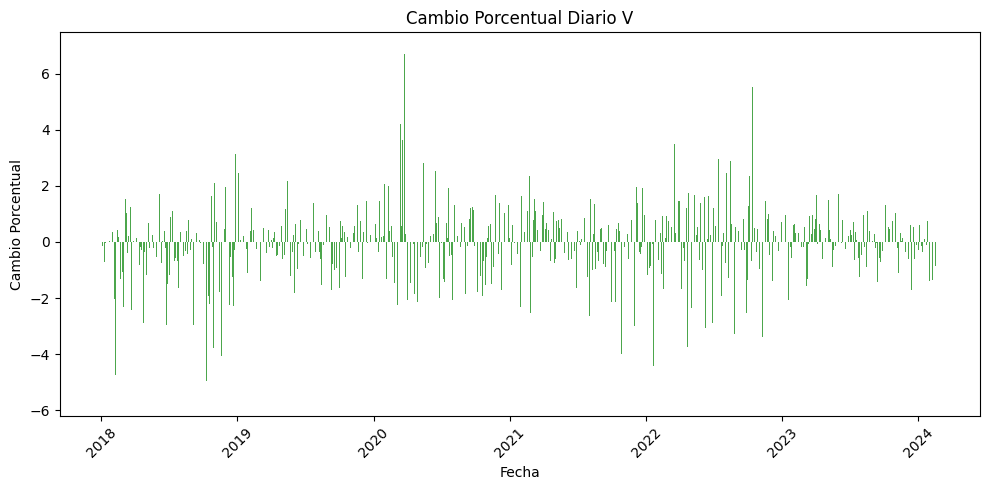

In [20]:
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    plt.figure(figsize=(10, 5))

    # Gráfico de Barras
    plt.bar(df_accion['Date'], df_accion['Cambio_porcentual_diario'], color='green', alpha=0.7)

    # O Gráfico de Línea
    # plt.plot(df['Fecha'], df['Cambio_porcentual_diario'], marker='o', linestyle='-', color='green')

    plt.title(f'Cambio Porcentual Diario {accion}')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio Porcentual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

En muchas acciones su cambio porcentual diario se mantiene muy en equilobrio despues de un pico alto los siguentes dias tendran variaciones muy pequeñas en positivo y muy grandes en negativo tambien puede ser dado por el momento de ventas de las acciones por parte de los accionistas

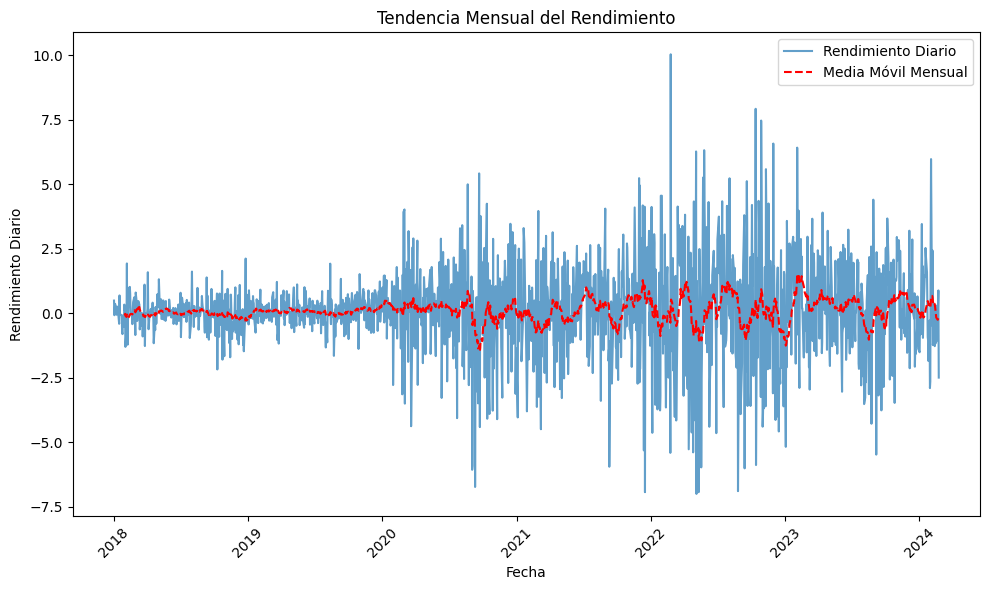

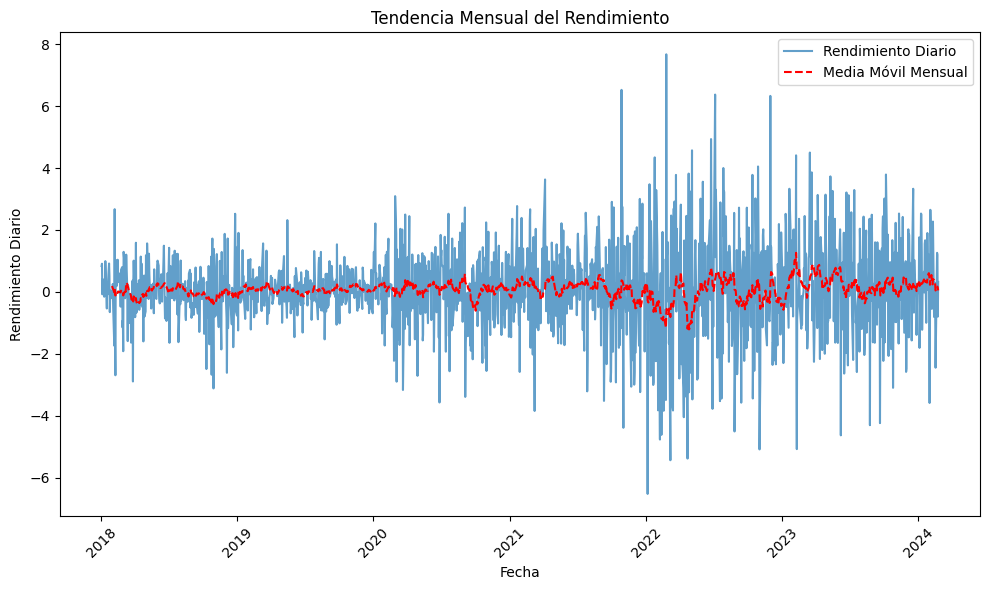

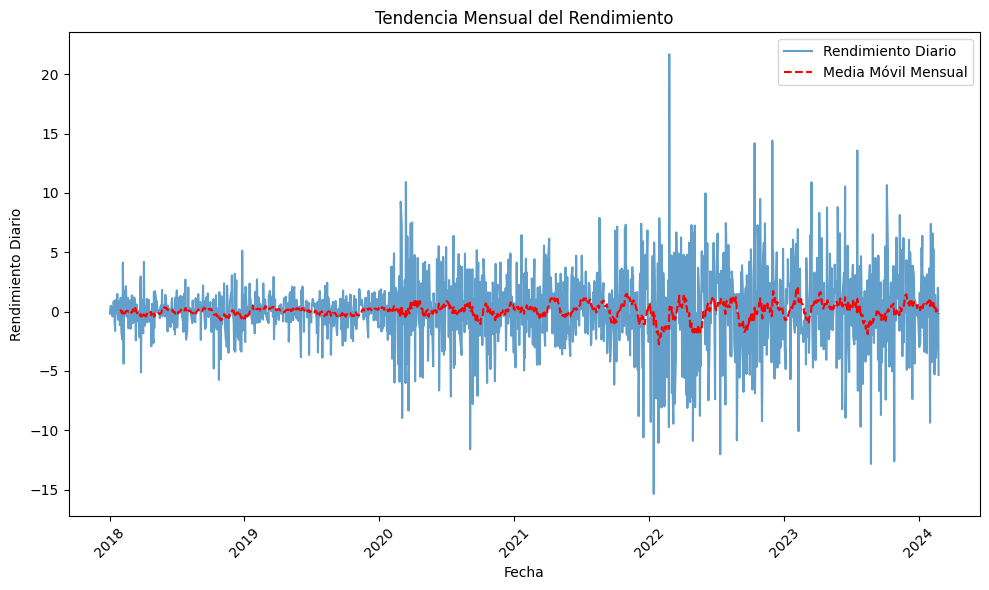

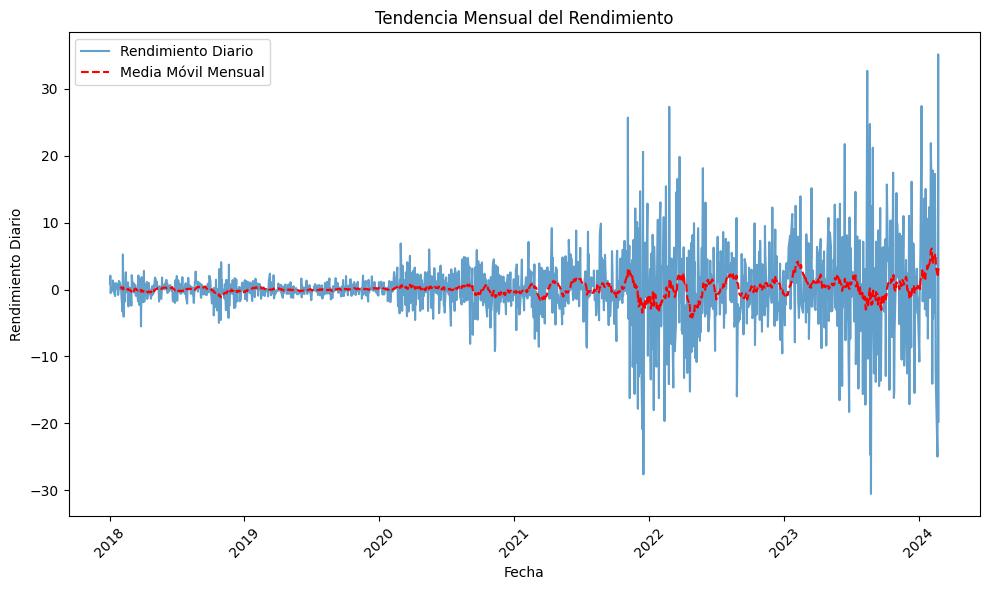

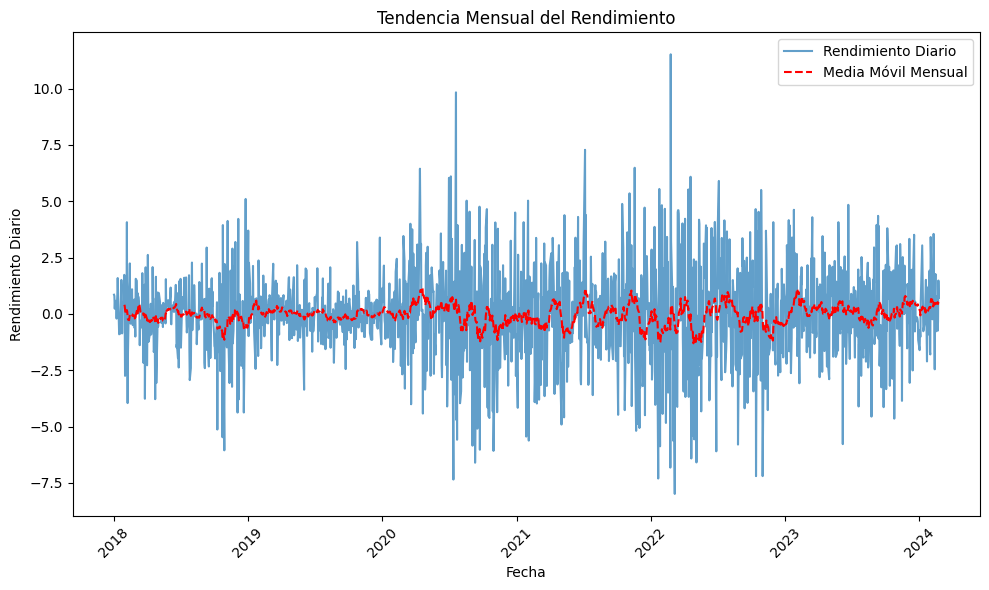

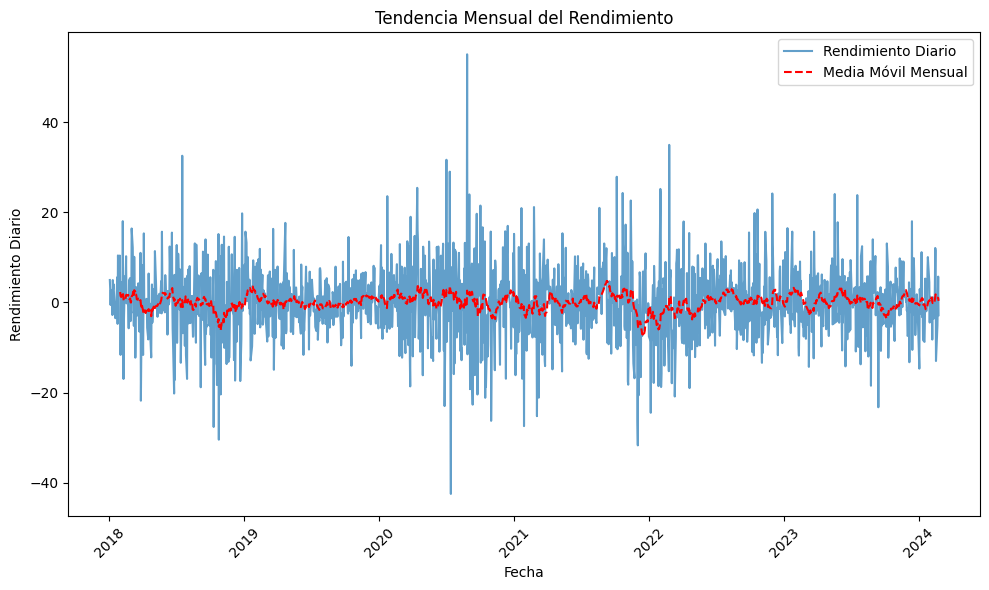

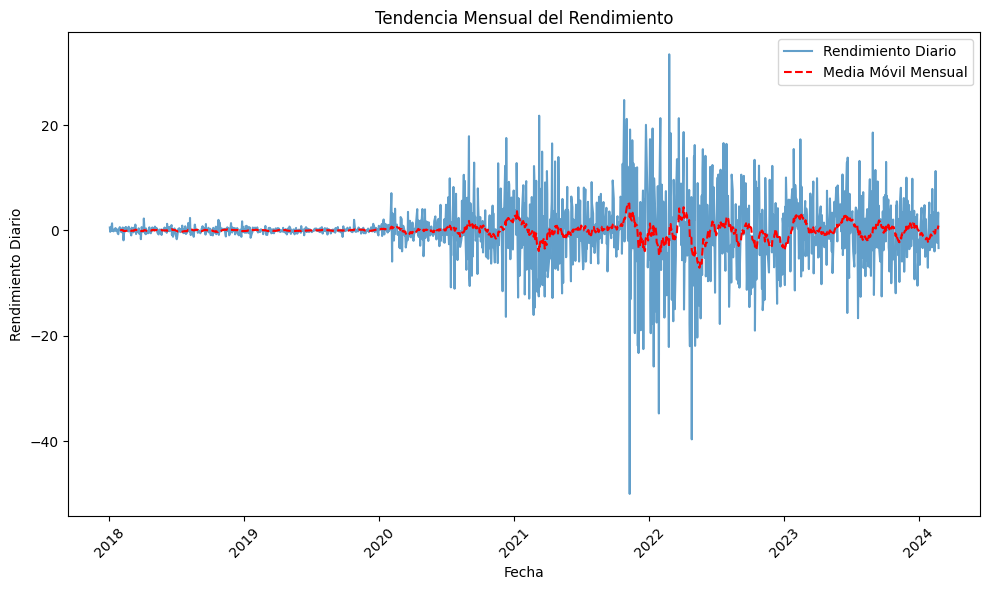

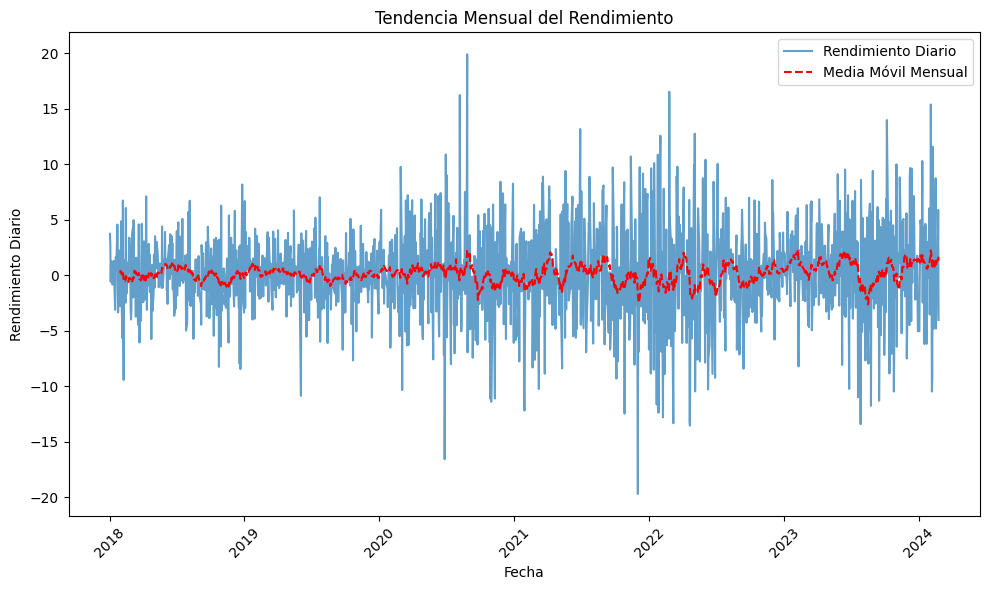

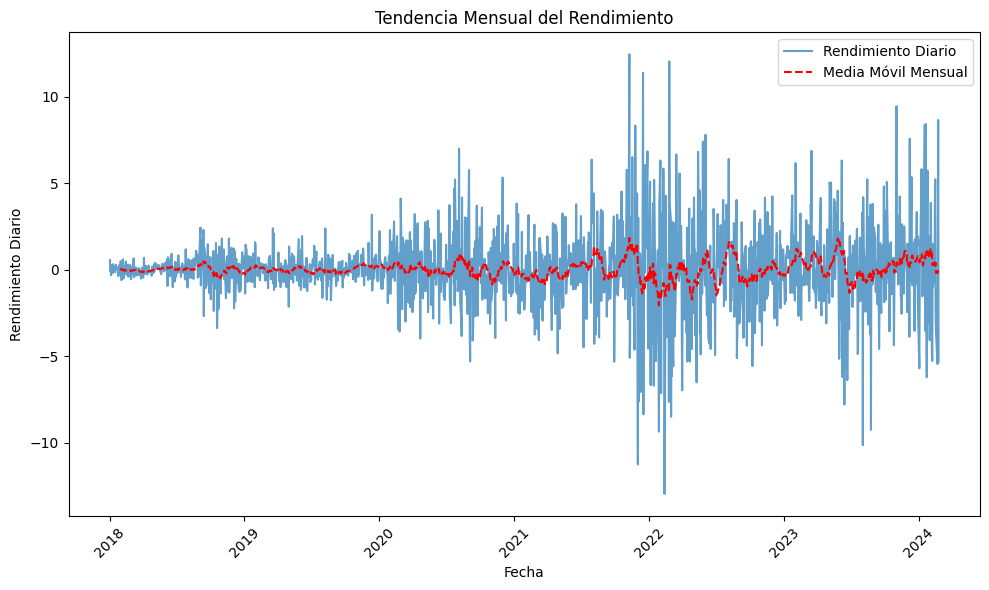

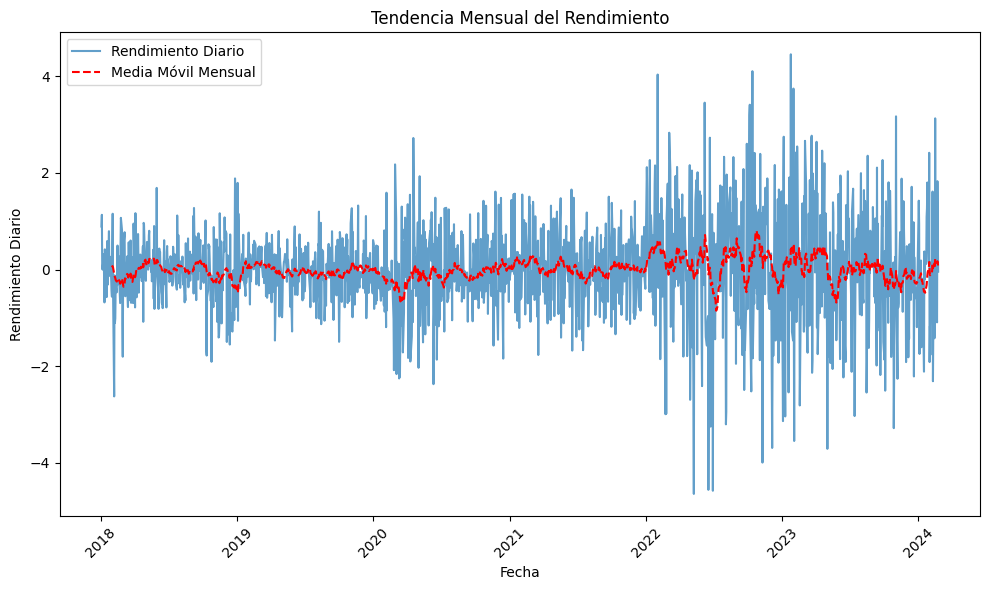

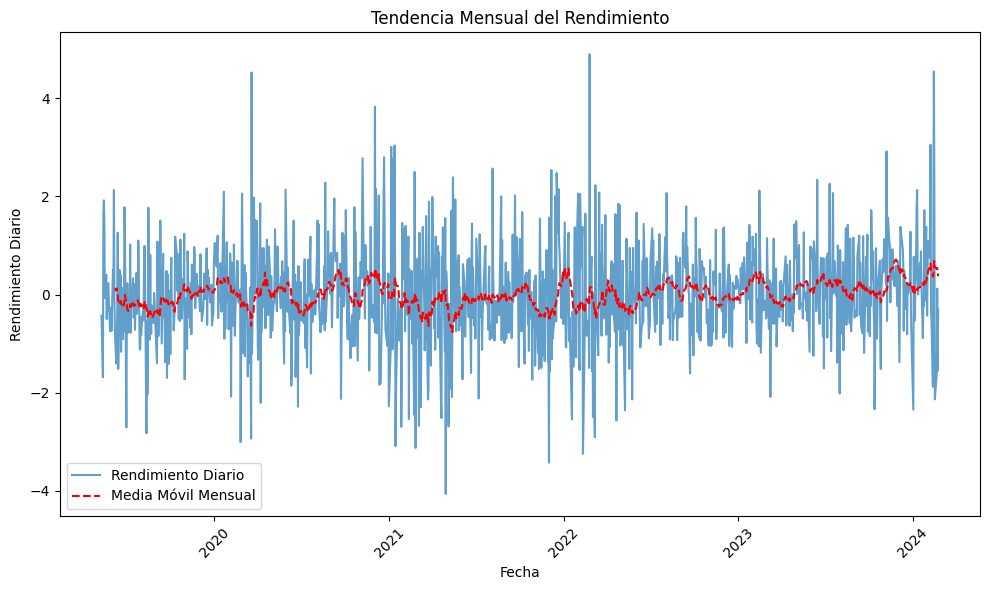

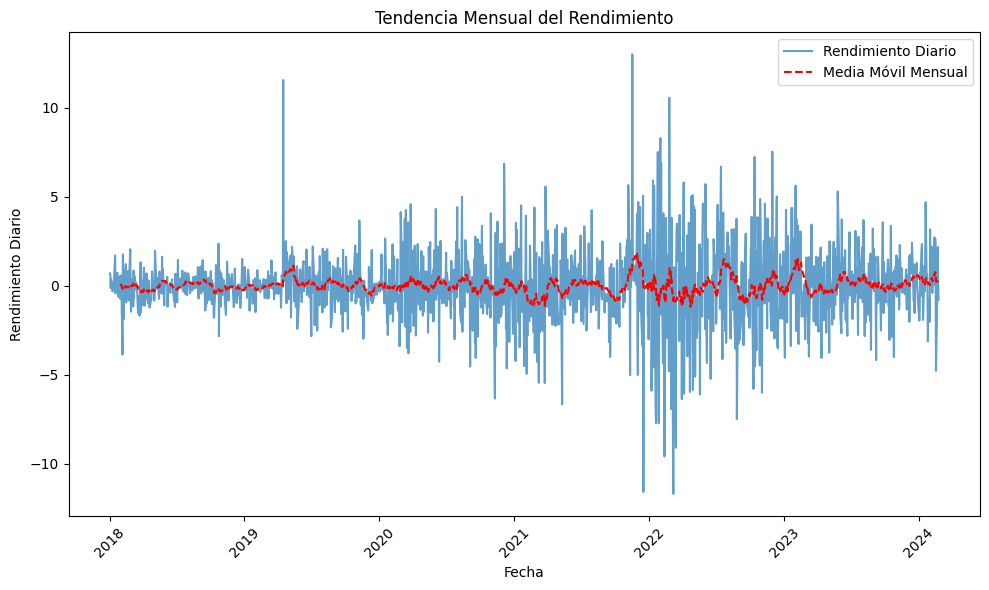

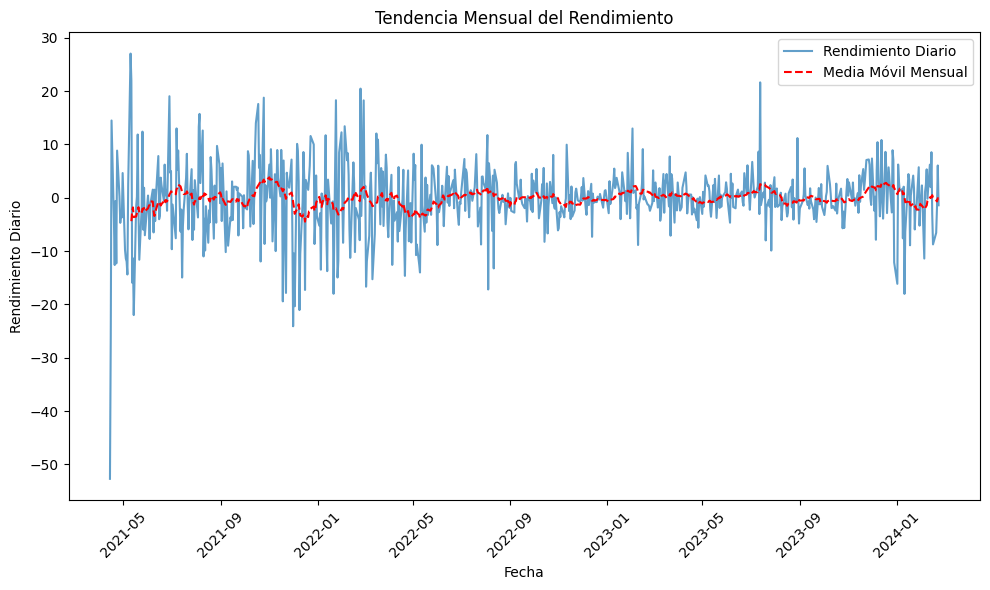

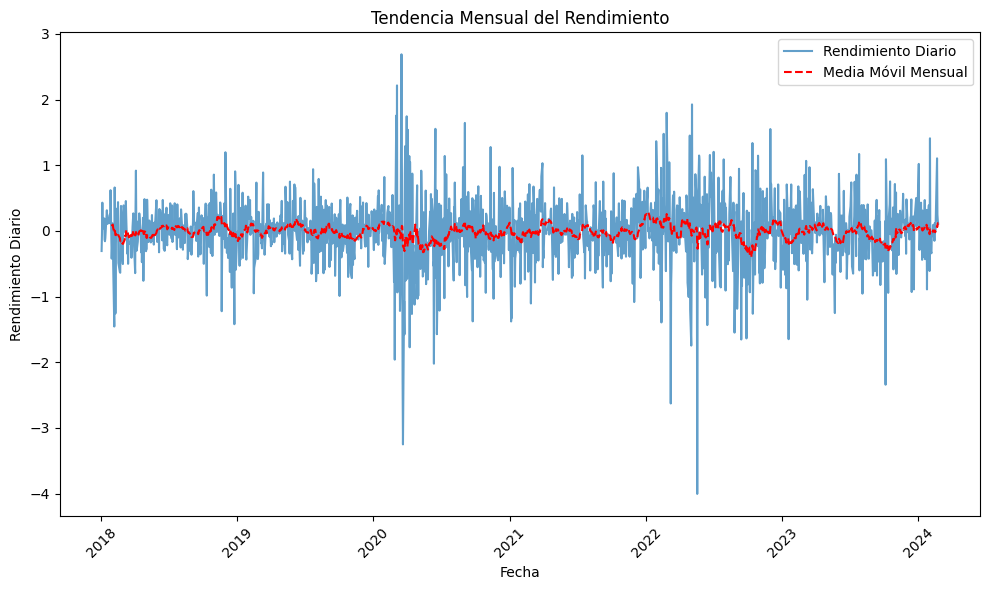

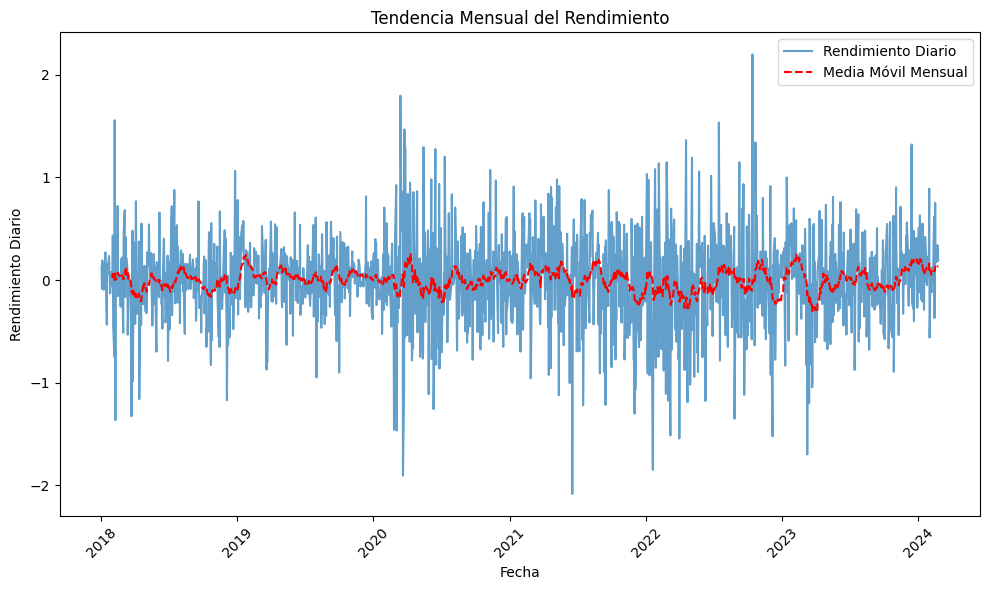

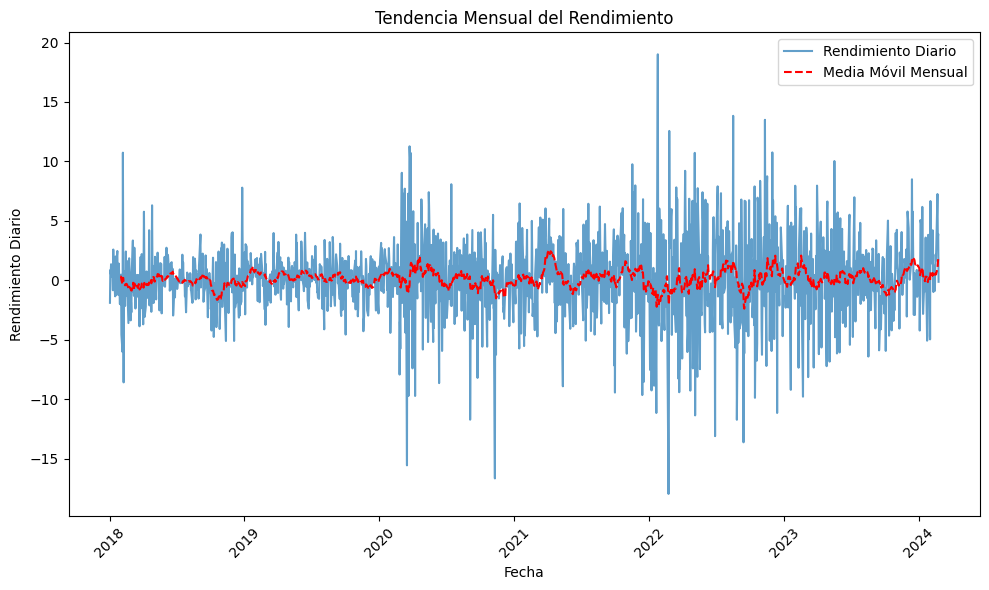

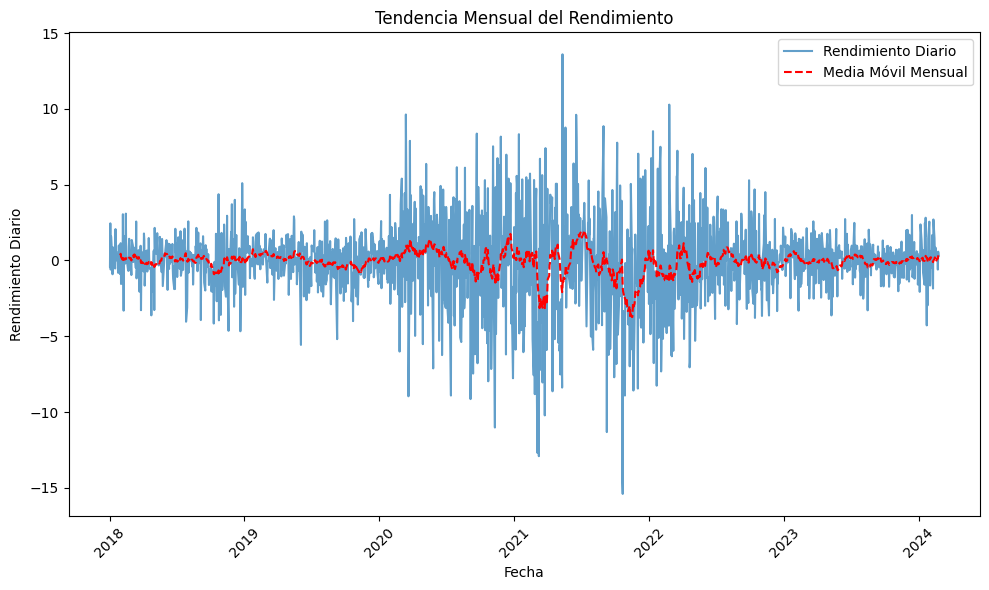

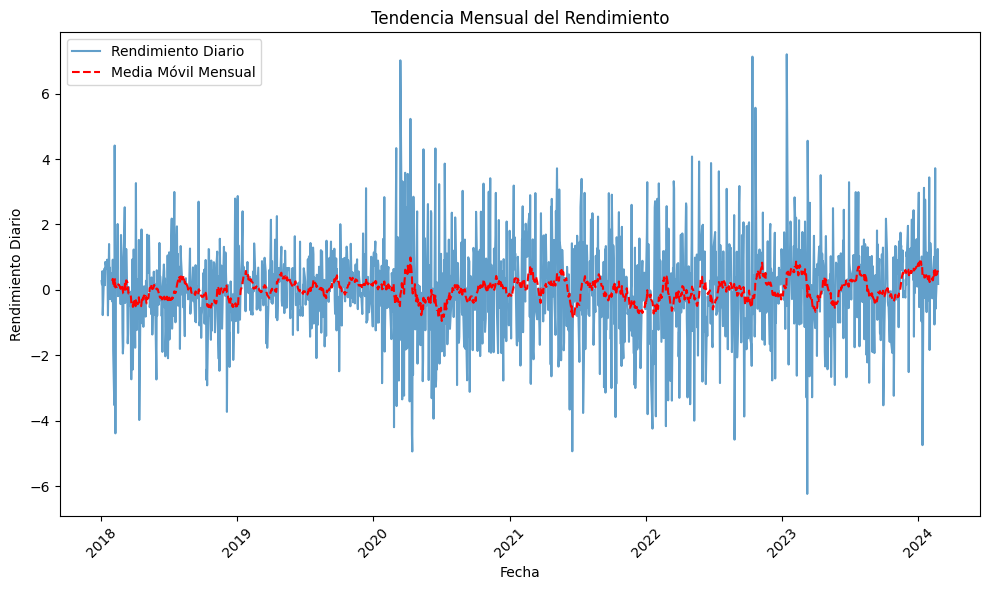

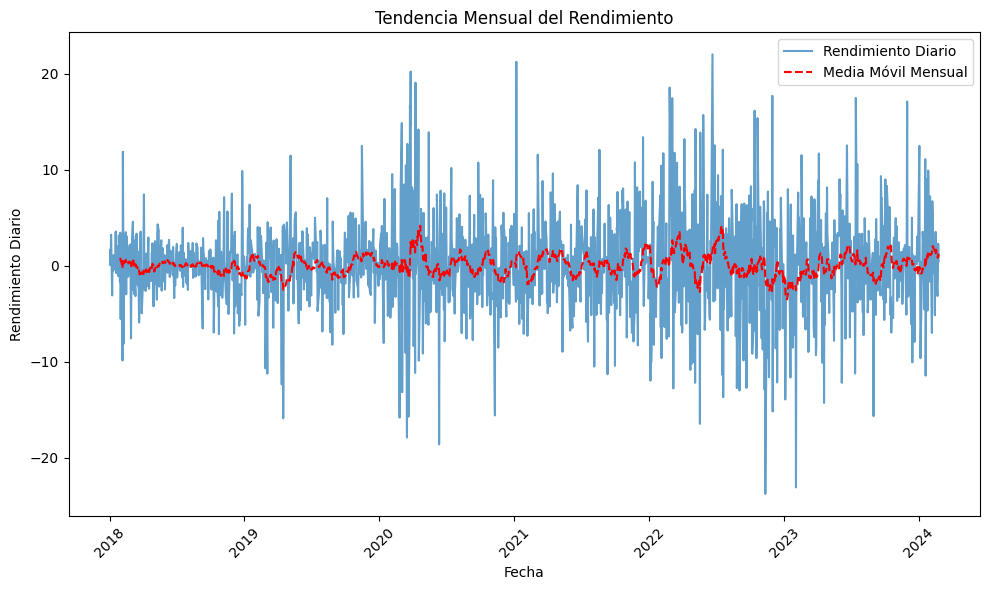

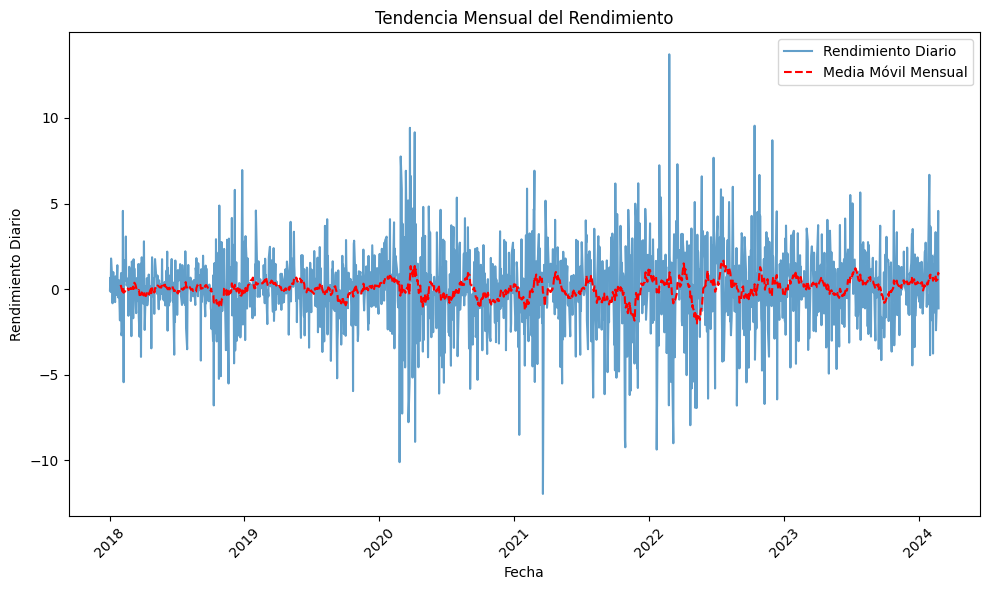

In [22]:
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    plt.figure(figsize=(10, 6))

    # Calcula la media móvil mensual (puedes ajustar la ventana según tus necesidades)
    media_movil = df_accion['Rendimiento_diario'].rolling(window=20).mean()

    plt.plot(df_accion['Date'], df_accion['Rendimiento_diario'], label='Rendimiento Diario', alpha=0.7)
    plt.plot(df_accion['Date'], media_movil, label='Media Móvil Mensual', color='red', linestyle='--')

    plt.title('Tendencia Mensual del Rendimiento')
    plt.xlabel('Fecha')
    plt.ylabel('Rendimiento Diario')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Una de las conclusiones que puedo dar de estos graficos es que el año 2020 tuvo un buen rendimiento mensual comparado con otros años

# Se van a probar modelos los seleccionados son randomforest y regresion lineal para una primer prueba

In [14]:
#Se crea Fecha en formato uniz para ser compatible con los modelos
df['Fecha'] = df['Date'].astype('int64') // 10**9

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelos_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Preprocesamiento de datos (asegurándonos de que 'Close' sea numérico)
    
    # División de datos en conjunto de entrenamiento y prueba
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
    
    # Inicialización del modelo de regresión lineal
    modelo_regresion = LinearRegression()
    
    # Entrenamiento del modelo
    modelo_regresion.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_por_accion[accion] = modelo_regresion

    # Predicciones en el conjunto de prueba
    y_pred = modelo_regresion.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)
    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
1496  1702339200   194.461868       191.396135
543   1583107200    72.857330        85.615325
1269  1674000000   134.287079       166.254029
528   1581033600    78.031296        83.775658
1094  1651795200   155.731430       146.554270
...          ...          ...              ...
756   1609718400   127.002113       109.224375
1246  1670889600   144.477066       163.494530
752   1609113600   134.146637       108.687806
869   1623801600   128.136459       121.718775
481   1574985600    65.007919        78.409965

[310 rows x 3 columns]
Resultados para la acción AAPL:
Mean Squared Error: 246.90448002401274
R-squared (R2): 0.91102661586206
-------------------------------------
Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
3038  1702339200   133.639999       137.949537
2085  1583107200    69.455498        79.062272
2811  1674000000    91.779999       123.953143
2070  1581033600  

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd

modelos_rf_por_accion = {}

# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    resultados = pd.DataFrame({'Fecha': X_test['Fecha'], 'Precio Real': y_test, 'Precio Predicho': y_pred})
    print(f'Resultados para la acción {accion}:')
    print(resultados)

    # Evaluación del rendimiento del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Resultados para Random Forest en la acción {accion}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print('-------------------------------------')
    nombre_archivo = f'modelo_rf_{accion}.joblib'
    joblib.dump(modelos_rf_por_accion, nombre_archivo)

# Ahora puedes comparar los resultados de Random Forest con los resultados de regresión lineal


Resultados para la acción AAPL:
           Fecha  Precio Real  Precio Predicho
1496  1702339200   194.461868       183.000842
543   1583107200    72.857330        70.081088
1269  1674000000   134.287079       152.455828
528   1581033600    78.031296        70.081088
1094  1651795200   155.731430       152.455828
...          ...          ...              ...
756   1609718400   127.002113       126.102396
1246  1670889600   144.477066       152.455828
752   1609113600   134.146637       126.102396
869   1623801600   128.136459       126.102396
481   1574985600    65.007919        70.081088

[310 rows x 3 columns]
Resultados para Random Forest en la acción AAPL:
Mean Squared Error: 63.58213991550171
R-squared (R2): 0.977087827007173
-------------------------------------
Resultados para la acción GOOG:
           Fecha  Precio Real  Precio Predicho
3038  1702339200   133.639999       134.518494
2085  1583107200    69.455498        66.451401
2811  1674000000    91.779999       107.115881
2

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

modelos_rf_por_accion = {}
fecha_futura = datetime(2024, 2, 29)
# Iterar sobre cada acción y entrenar un modelo Random Forest por acción
for accion in acciones:
    # Filtrar datos para la acción específica
    df_accion = df[df['Ticket'] == accion]
    
    # Obtener características (X) y variable objetivo (y) para la acción actual
    X = df_accion[['Fecha']]  # Agrega las características relevantes
    y = df_accion['Close']
    
    # División de datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inicialización del modelo de Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
    
    # Entrenamiento del modelo
    modelo_rf.fit(X_train, y_train)
    
    # Almacenar el modelo en el diccionario
    modelos_rf_por_accion[accion] = modelo_rf

    # Predicciones en el conjunto de prueba
    y_pred = modelo_rf.predict(X_test)
    
    datos_prediccion = pd.DataFrame({'Fecha': [fecha_futura]})

    # Hacer la predicción utilizando el modelo correspondiente
    modelo_rf = modelos_rf_por_accion[accion]
    prediccion = modelo_rf.predict(datos_prediccion[['Fecha']])

    # Imprimir la predicción para la fecha futura
    print(f'Predicción para la acción {accion} en la fecha {fecha_futura}: {prediccion[0]}')

Predicción para la acción AAPL en la fecha 2024-02-29 00:00:00: 183.00084236874633
Predicción para la acción GOOG en la fecha 2024-02-29 00:00:00: 144.14451065235014
Predicción para la acción MSFT en la fecha 2024-02-29 00:00:00: 385.26329265270914
Predicción para la acción NVDA en la fecha 2024-02-29 00:00:00: 717.5788298491549
Predicción para la acción AMZN en la fecha 2024-02-29 00:00:00: 141.13571438424725
Predicción para la acción NFLX en la fecha 2024-02-29 00:00:00: 448.6769653002394
Predicción para la acción TSLA en la fecha 2024-02-29 00:00:00: 213.85889979798577
Predicción para la acción META en la fecha 2024-02-29 00:00:00: 385.5916903479343
Predicción para la acción AMD en la fecha 2024-02-29 00:00:00: 171.4968719728547
Predicción para la acción XOM en la fecha 2024-02-29 00:00:00: 100.98685662633658
Predicción para la acción UBER en la fecha 2024-02-29 00:00:00: 77.55739608422951
Predicción para la acción QCOM en la fecha 2024-02-29 00:00:00: 144.84451544131852
Predicción 

Se elige el modelo de randomforest para aplicar en la api por tener mejor precision y estar un poco mas cerca de los datos.
Me hubiera utilizar otros modelos de regresion lineal pero cuando se hicieron las pruebas sus resultados no fueron sastifactorios.
Por ultimo en el deploy no se utilizaron los modelos entrenados en archivo picket por que al probarlos perdian precision voy a investigar
la razon para tenerla presente en un fututo